In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction as pi  # use `import pairinteraction.real as pi` for better performance
from pairinteraction.visualization.colormaps import alphamagma

if pi.Database.get_global_database() is None:
    
    pi.Database.initialize_global_database(download_missing=True)

In [10]:
ns = np.arange(60,80)

Rb_c6s = []
Cs_c6s = []

for n in ns:
    ket1 = pi.KetAtom("Rb", n, l=1, j=1.5, m=0.5)
    ket2 = pi.KetAtom("Cs", n, l=1, j=1.5, m=0.5)

    c6_obj = pi.C6(ket1, ket1)
    c6_obj.set_diamagnetism_enabled(False)
    c6_obj.set_magnetic_field([0, 0, 6.67], "gauss")
    c6 = c6_obj.get("GHz um^6")
    Rb_c6s.append(c6)

    c6_obj = pi.C6(ket2, ket2)
    c6_obj.set_diamagnetism_enabled(False)
    c6_obj.set_magnetic_field([0, 0, 6.67], "gauss")
    c6 = c6_obj.get("GHz um^6")    
    Cs_c6s.append(c6)

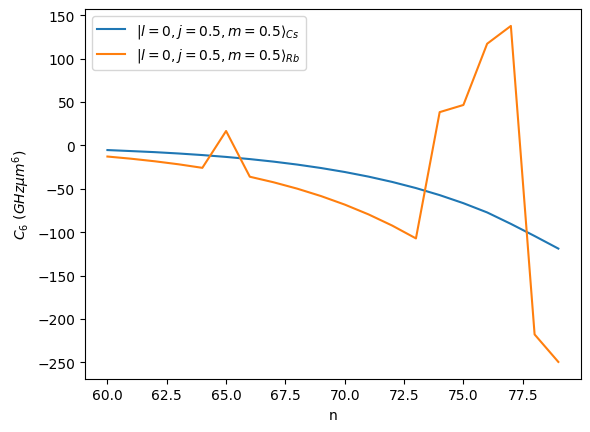

In [6]:
plt.figure()
plt.plot(ns,Cs_c6s, label = r'$|l=0, j=0.5, m=0.5 \rangle_{Cs} $')
plt.plot(ns,Rb_c6s, label = r'$|l=0, j=0.5, m=0.5 \rangle_{Rb} $')
plt.legend()
plt.ylabel('$C_6$ $(GHz \mu m^6)$')
plt.xlabel('n')
plt.show()

In [4]:
n_Rb = 68
n_Cs = 67


Rb_68 = pi.KetAtom("Rb", n=68, l=0, j=0.5, m=0.5)
Rb_67 = pi.KetAtom("Rb", n=67, l=1, j=0.5, m=0.5)

Cs_s = pi.KetAtom("Cs", n=67, l=0, j=0.5, m=0.5)
Cs_p = pi.KetAtom("Cs", n=67, l=1, j=1.5, m=0.5)

energy_1 = Rb_68.get_energy("1/cm")
energy_2 = Cs_s.get_energy("1/cm")

basis1 = pi.BasisAtom(
    "Rb",
    n=(Rb_67.n, Rb_68.n)
)

basis2 = pi.BasisAtom(
    "Cs",
    l=(Cs_s.l, Cs_p.l)
)

The single-channel quantum defect theory can be inaccurate for effective principal quantum numbers < 25. This can lead to inaccurate matrix elements.


In [5]:
system1 = pi.SystemAtom(basis1)
system1.diagonalize()
system2 = pi.SystemAtom(basis2)
system2.diagonalize()

energy_shifted = system1.get_corresponding_energy(Rb_68, unit="GHz")
distances = np.linspace(1,7,100)
pair_energy = 2 * energy_shifted

pair_basis = pi.BasisPair(
    [system1,system2],
    energy=(pair_energy - .8, pair_energy + .8),
    energy_unit="GHz",
    m=(2 * Rb_68.m, 2 * Rb_68.m),
)


pair_systems = [
    pi.SystemPair(pair_basis).set_distance_vector([0, 0, d], unit="micrometer")
    for d in distances
]
pi.diagonalize(
    pair_systems,
    diagonalizer="lapacke_evr",
    float_type="float64",
    energy_range=(pair_energy, pair_energy + 0.5),
    energy_range_unit="GHz",
)

pair_eigenenergies = [s.get_eigenenergies(unit="GHz") for s in pair_systems]
pair_overlaps = [s.get_eigenbasis().get_overlaps([Rb_68,Rb_68]) for s in pair_systems]

distances_repeated = np.hstack(
    [d * np.ones_like(e) for d, e in zip(distances, pair_eigenenergies)]
)
pair_eigenenergies_flattened = np.hstack(pair_eigenenergies)
pair_overlaps_flattened = np.hstack(pair_overlaps)
sorter = np.argsort(pair_eigenenergies_flattened)

scat = plt.scatter(
    distances_repeated[sorter],
    pair_eigenenergies_flattened[sorter] - pair_energy,
    c=pair_overlaps_flattened[sorter],
    s=10,
    cmap=alphamagma,
    vmin=0,
    vmax=1,
)
plt.colorbar(scat, label=f"Overlap with 2x{Rb_68}")
plt.xlabel("Distance (μm)")
plt.ylabel("Eigenenergy (GHz)")
plt.show()

ValueError: The basis must contain at least one element.